<a href="https://colab.research.google.com/github/apelmarcqinstitution/fepcc/blob/main/traitement_FEPCC_Marcq_Institution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comment importer les FEPCCs

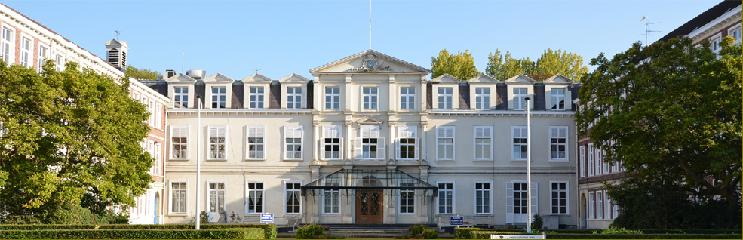

1) Exporter de Lime Survey les réponses
2) Ajouter les données de classes
3) trier le fichier
4) Initialiser le programme


module : !pip install reportlab

In [48]:
#@title Traitement des FEPCC complets { display-mode: "form" }
"""
   conversion Survey, Excel vers PDF
   Fait par Jean-Paul Varga  - le 19/11/2017
    """


!pip install reportlab

!clear

# Connection des modules



import xlrd
import os
import zipfile
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import mm
from reportlab.lib.units import inch
from termcolor import colored
from google.colab import drive
from google.colab import files
import datetime
import xlwt
from xlrd import open_workbook
from google.colab import output
drive.mount('/content/drive')

Mois=['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Decembre']
dat = datetime.datetime.now()
mois = dat.date().month
y=dat.date().year
print ("Bonjour")


datation=(Mois[mois-1]) +" " +str(y)
# Importation Colab
drive.mount('/content/drive')
print (colored('Connection sur le drive', 'red'), colored('OK', 'green'))
print ("Pouvez vous importer fepcc.xls")

uploaded = files.upload()
chemin='/content/drive/My Drive/fepcc/'
!mv fepcc.xlsx 'drive/MyDrive/fepcc'
!rm 'drive/MyDrive/fepcc/fepcc.zip'
!rm -rf  'drive/MyDrive/fepcc/res/'
!mkdir  'drive/MyDrive/fepcc/res/'
!rm 'drive/MyDrive/fepcc/fepcc-cond.zip'
!rm -rf  'drive/MyDrive/fepcc/resc/'
!mkdir  'drive/MyDrive/fepcc/resc/'

def addPageNumber(canvas, doc):
    """
    Add the page number
    """
    page_num = canvas.getPageNumber()
    text = "Page - %s - " % page_num
    canvas.drawRightString(200 * mm, 20 * mm, text)


def zip():
    zf = zipfile.ZipFile(chemin+"/fepcc.zip", "w")
    for dirname, subdirs, files in os.walk(chemin+"res"):
        zf.write(dirname)
        for filename in files:
            zf.write(os.path.join(dirname, filename))
    zf.close()

def zipc():
    zf = zipfile.ZipFile(chemin+"/fepcc-cond.zip", "w")
    for dirname, subdirs, files in os.walk(chemin+"resc"):
        zf.write(dirname)
        for filename in files:
            zf.write(os.path.join(dirname, filename))
    zf.close()


# ----------------------------------------------------------------------
def createpdf():
    """
   pour plus tard..
    """
    doc = SimpleDocTemplate(f1, pagesize=letter,
                            rightMargin=72, leftMargin=72,
                            topMargin=72, bottomMargin=18)
    styles = getSampleStyleSheet()
    styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))

    Story = []





def generefepcc():
    print ("Génération des fichiers détaillés")
    print (datation)
    ligne = 0
    logo = chemin+"static/logo.png"
    logo2 = chemin+"static/mi.jpg"
    bn = chemin+"static/pi.jpg"
    f = chemin+"fepcc.xlsx"
    q1 = "Identité de l'enfant"
    q2 = "Classe"
    q3 = "Identité parent"
    q4 = "Rien à signaler"
    q5 = "A propos de votre enfant : - Quelles sont les informations personnelles ou familiales que vous souhaitez nous communiquer ?"
    q6 = "Votre enfant rencontre-t-il des difficultés scolaires pour ce trimestre ? Pourquoi ?"
    q7 = "Sentez-vous votre enfant intégré et épanoui au sein du lycée/collège/annexe ? Dans sa classe ? Pourquoi ?"
    q8 = "Quels sont les points positifs de ce trimestre ?"
    q9 = "N'hésitez pas à prendre rendez-vous avec le(s) professeur(s) concerné(s) via le carnet de correspondance de votre enfant."
    q10 = "Souhaitez-vous nous faire part d'autres informations ?"
    r2 = ""
    nc = 0
    doc = "vide"
    init = 0
    workbook = xlrd.open_workbook(f)
    sheet = workbook.sheet_by_index(0)
    for rowx in range(sheet.nrows):
        cols = sheet.row_values(rowx)
        r1=cols[9]+" "+cols[10] # nom + prenom de l'enfant
        cc = r2
        r2=cols[11] # classe rectifié par le parent
        r3=cols[13]+" "+cols[14] # nom + prenom parent
        r4=cols[16] # Si vous n'avez rien à signaler, cochez R.A.S. et "Envoyer" le formulaire en bas de page. [Rien à signaler]
        r5=cols[17] # A propos de votre enfant :    	- Quelles sont les informations personnelles ou familiales que vous souhaitez nous communiquer ?
        r6 = cols[18] # - Votre enfant rencontre-t-il des difficultés scolaires pour ce  trimestre ? Pourquoi ?
        r7 = cols[19]
        r8 = cols[20]
        r9 = cols[21]
        r10 = cols[22]
        r11 = cols[6] # réponse
        ligne=ligne+1
        if ligne == 500:
          print ("25 %")
        if ligne == 1000:
          print ("50 %")
        if ligne == 1500:
          print ("75 %")
        if ligne == 1900:
          print ("100 %")  
        if nc == 1:
            f1 = chemin+"res/"+ r2 + '-fepcc-rapport.pdf'
            doc = SimpleDocTemplate(f1, pagesize=letter,
                                    rightMargin=72, leftMargin=72,
                                    topMargin=72, bottomMargin=18)
            styles = getSampleStyleSheet()
            styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
            Story = []
            im = Image(logo, 5 * inch, 1 * inch)
            Story.append(im)
            Story.append(Spacer(1, 20))
            ptext = '<font size=15 color=blue  >          Préparation conseil de classe  : APEL Marcq Institution  </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(15, 22))
            ptext = '<font size=12>Ensemble des commentaires pour les élèves de la classe de %s </font>' % r2
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 22))
            ptext = '<font size=18 >    </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            im = Image(logo2, 6 * inch, 2 * inch)
            Story.append(im)
            ptext = '<font size=18 >    </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 20))
            ptext = '<font size=14 >     '+datation+ ' (c) JPV </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            ptext = '<font size=14 >Confidentiel - à destination uniquement des parents correspondants  </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(11, 21))
            Story.append(PageBreak())
            nc = 0
        if r2 != cc:
            if doc != "vide":
                doc.build(Story, onFirstPage=addPageNumber, onLaterPages=addPageNumber)
            nc = 1
        if doc != "vide":
            im = Image(logo, 5 * inch, 1 * inch)
            Story.append(im)
            Story.append(Spacer(5, 12))
            ptext = '<font size=14  >Nom élève : %s</font>' % r1
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>Classe : %s</font>' % r2
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>Parents : %s </font>' % r3
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 22))
            ptext = '<font size=12 color=red >Tout va bien pour l\'enfant (rien à signaler) : %s</font>' % r4
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12 color=green >Question 1 : A propos de votre enfant : - Quelles sont les informations personnelles ou familiales que vous souhaitez nous communiquer ? </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>%s </font>' % r5
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12 color=green >Question 2 : Votre enfant rencontre-t-il des difficultés scolaires pour ce trimestre ? Pourquoi ? </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>%s </font>' % r6
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12 color=blue  >Question 3 : Sentez-vous votre enfant intégré et épanoui au sein du lycée/collège/annexe ? Dans sa classe ? Pourquoi </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>%s </font>' % r7
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 12))
            ptext = '<font size=12 color=green >Question 5 : Quels sont les points positifs de ce trimestre ? </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>%s </font>' % r8
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12 color=green >Question 6 : N\' hesitez pas à prendre rendez-vous avec le(s) professeur(s) concerné(s) via le carnet de correspondance de votre enfant </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>%s </font>' % r9
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12 color=green >Question 7 : Souhaitez-vous nous faire part d\'autres informations ? </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=12>%s </font>' % r10
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            im = Image(bn , 4 * inch, 2 * inch)
            Story.append(im)
            ptext = '<font size=8 color=pink > Post-it pour apporter des remarques sur %s </font>' % r1
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            ptext = '<font size=6 color=blue  > réponse au questionnaire  %s </font>' % r11
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            Story.append(PageBreak())



def generefepcc_cond():
    print ("Génération des fichiers condensés")
    ligne = 0
    logo = chemin+"static/logo.png"
    logo2 = chemin+"static/mi.jpg"
    bn = chemin+"static/pi.jpg"
    f = chemin+"fepcc.xlsx"
    q1 = "Identité de l'enfant"
    q2 = "Classe"
    q3 = "Identité parent"
    q4 = "Rien à signaler"
    q5 = "A propos de votre enfant : - Quelles sont les informations personnelles ou familiales que vous souhaitez nous communiquer ?"
    q6 = "Votre enfant rencontre-t-il des difficultés scolaires pour ce trimestre ? Pourquoi ?"
    q7 = "Sentez-vous votre enfant intégré et épanoui au sein du lycée/collège/annexe ? Dans sa classe ? Pourquoi ?"
    q8 = "Quels sont les points positifs de ce trimestre ?"
    q9 = "N'hésitez pas à prendre rendez-vous avec le(s) professeur(s) concerné(s) via le carnet de correspondance de votre enfant."
    q10 = "Souhaitez-vous nous faire part d'autres informations ?"
    r2 = ""
    nc = 0
    doc = "vide"
    init = 0
    workbook = xlrd.open_workbook(f)
    sheet = workbook.sheet_by_index(0)
    ligne=0
    for rowx in range(sheet.nrows):
        ligne=ligne+1
        cols = sheet.row_values(rowx)
        r1=cols[9]+" "+cols[10] # nom + prenom de l'enfant
        cc = r2
        r2=cols[11] # classe rectifié par le parent
        r3=cols[13]+" "+cols[14] # nom + prenom parent
        r4=cols[16] # Si vous n'avez rien à signaler, cochez R.A.S. et "Envoyer" le formulaire en bas de page. [Rien à signaler]
        r5=cols[17] # A propos de votre enfant :    	- Quelles sont les informations personnelles ou familiales que vous souhaitez nous communiquer ?
        r6 = cols[18] # - Votre enfant rencontre-t-il des difficultés scolaires pour ce  trimestre ? Pourquoi ?
        r7 = cols[19]
        r8 = cols[20]
        r9 = cols[21]
        r10 = cols[22]
        r11 = cols[6] # réponse
        ligne=ligne+1
        if ligne == 500:
          print ("25 %")
        if ligne == 1000:
          print ("50 %")
        if ligne == 1500:
          print ("75 %")
        if ligne == 1900:
          print ("100 %")

        prenom = cols[10]
        fin=cols[13]
        if nc == 1:
            f1 = chemin+"resc/"+ r2 + '-fepcc-rapport-condense.pdf'
            doc = SimpleDocTemplate(f1, pagesize=letter,
                                    rightMargin=72, leftMargin=72,
                                    topMargin=72, bottomMargin=18)
            styles = getSampleStyleSheet()
            styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
            Story = []
            ptext = '<font size=14 color=red >Préparation conseil de classe : Ensemble des commentaires en format condensé pour les élèves de la classe de %s </font>' % r2
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 22))
            ptext = '<font size=12 >    </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            ptext = '<font size=14 >    </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 20))
            ptext = '<font size=14 >  Rapports du Trimestre '+datation+'  (c) JPV  </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(11, 21))
            ptext = '<font size=14 > Confidentiel - à destination uniquement des parents correspondants </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(11, 21))
            ptext = '<font size=12>     --------------------------------------------------------------------------    </font>'
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            nc = 0
        if r2 != cc:
            if doc != "vide":
                doc.build(Story, onFirstPage=addPageNumber, onLaterPages=addPageNumber)
            nc = 1
        if doc != "vide":
            ptext = '<font size=12 color=red  >%s   Classe : %s  Parents : %s </font>' % (r1,r2,r3)
            Story.append(Paragraph(ptext, styles["Normal"]))
            Story.append(Spacer(1, 10))
            if r4 == "Oui"  :
                ptext = '<font size=10 >Tout va bien pour %s  pas de commentaires </font>' % prenom
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
                ptext = '<font size=12>     --------------------------------------------------------------------------    </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            if r4 == "Non"  :
                ptext = '<font size=10  >    Il y a des commentaires pour %s  -> </font>' %prenom
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            if len(r5)>0  :
                ptext = '<font size=8 color=green >    Question 1 : A propos de votre enfant : - Quelles sont les informations personnelles ou familiales que vous souhaitez nous communiquer ? </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
                ptext = '<font size=10>%s </font>' % r5
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            if len(r6) > 0  :
                ptext = '<font size=8 color=green >    Question 2 : Votre enfant rencontre-t-il des difficultés scolaires pour ce trimestre ? Pourquoi ? </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
                ptext = '<font size=10>%s </font>' % r6
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            if len(r7) > 0   :
                ptext = '<font size=8 color=green >    Question 3 : Sentez-vous votre enfant intégré et épanoui au sein du lycée/collège/annexe ? Dans sa classe ? Pourquoi </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
                ptext = '<font size=10>%s </font>' % r7
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 12))
            if len(r8) > 0   :
                ptext = '<font size=8 color=green >    Question 5 : Quels sont les points positifs de ce trimestre ? </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
                ptext = '<font size=10>%s </font>' % r8
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            if len(r9) > 0  :
                ptext = '<font size=8 color=green >    Question 6 : N\' hesitez pas à prendre rendez-vous avec le(s) professeur(s) concerné(s) via le carnet de correspondance de votre enfant </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
                ptext = '<font size=10>%s </font>' % r9
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            if len(r10) > 0   :
                ptext = '<font size=8 color=green >    Question 7 : Souhaitez-vous nous faire part d\'autres informations ? </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(2, 10))
                ptext = '<font size=10>%s </font>' % r10
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))

                ptext = '<font size=10>     --------------------------------------------------------------------------    </font>'
                Story.append(Paragraph(ptext, styles["Normal"]))
                Story.append(Spacer(1, 10))
            # Story.append(PageBreak())


generefepcc()
generefepcc_cond()
output.eval_js('new Audio("https://lasonotheque.org/UPLOAD/ogg/1895.ogg").play()')
print ("C'est fini")
zip()
zipc()
files.download('drive/MyDrive/fepcc/fepcc.zip') 
files.download('drive/MyDrive/fepcc/fepcc-cond.zip') 
print ("Et disponible en zip (vérifier les fenetres de téléchargeent")
# Lancer le programme 






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Bonjour
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Connection sur le drive OK
Pouvez vous importer fepcc.xls


Saving fepcc.xlsx to fepcc.xlsx
rm: cannot remove 'drive/MyDrive/fepcc/fepcc.zip': No such file or directory
rm: cannot remove 'drive/MyDrive/fepcc/fepcc-cond.zip': No such file or directory
Génération des fichiers détaillés
Novembre 2020
25 %
50 %
75 %
100 %
Génération des fichiers condensés
25 %
50 %
75 %
100 %
C'est fini


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Et disponible en zip (vérifier les fenetres de téléchargeent
